In [1]:
# Install spaCy and download model (run in Colab)
!pip install spacy
!python -m spacy download en_core_web_md

import spacy
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_md")

# Sample Amazon reviews (replace with your actual data)
# If you downloaded from Kaggle, load it here instead
sample_reviews = [
    "I absolutely love my new iPhone from Apple. The camera quality is stunning and battery life lasts all day!",
    "This Samsung Galaxy phone is terrible. It keeps freezing and the customer service was unhelpful.",
    "Bought a MacBook Pro for work and it's been fantastic. Apple products never disappoint.",
    "The Google Pixel camera is amazing but the battery drains too quickly.",
    "My Dell laptop stopped working after 2 months. Worst purchase ever.",
    "Microsoft Surface Pro is perfect for drawing and design work. Highly recommended!",
    "This HP printer is a nightmare. It jams every time I try to print.",
    "Sony headphones have incredible sound quality. Best audio experience I've had.",
    "Avoid this Acer laptop at all costs. It's slow and the build quality is cheap.",
    "The new iPad from Apple is worth every penny. Perfect for students and professionals."
]

print(f"Loaded {len(sample_reviews)} reviews for analysis")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 16.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Loaded 10 reviews for analysis


In [2]:
def extract_entities(reviews):
    """Extract product names and brands using NER"""
    entities_data = []

    for i, review in enumerate(reviews):
        doc = nlp(review)
        review_entities = []

        for ent in doc.ents:
            # Focus on organizations (brands) and products
            if ent.label_ in ["ORG", "PRODUCT"]:
                review_entities.append({
                    'text': ent.text,
                    'label': ent.label_,
                    'description': spacy.explain(ent.label_)
                })

        entities_data.append({
            'review_id': i,
            'review_text': review,
            'entities': review_entities
        })

    return entities_data

# Extract entities from all reviews
entities_data = extract_entities(sample_reviews)

# Display results
print("🔍 NAMED ENTITY RECOGNITION RESULTS:\n")
for data in entities_data[:3]:  # Show first 3 reviews
    print(f"Review {data['review_id'] + 1}: {data['review_text']}")
    if data['entities']:
        print("Entities found:")
        for ent in data['entities']:
            print(f"  - {ent['text']} ({ent['label']}: {ent['description']})")
    else:
        print("  No relevant entities found")
    print("-" * 80)

🔍 NAMED ENTITY RECOGNITION RESULTS:

Review 1: I absolutely love my new iPhone from Apple. The camera quality is stunning and battery life lasts all day!
Entities found:
  - Apple (ORG: Companies, agencies, institutions, etc.)
--------------------------------------------------------------------------------
Review 2: This Samsung Galaxy phone is terrible. It keeps freezing and the customer service was unhelpful.
  No relevant entities found
--------------------------------------------------------------------------------
Review 3: Bought a MacBook Pro for work and it's been fantastic. Apple products never disappoint.
Entities found:
  - MacBook Pro (ORG: Companies, agencies, institutions, etc.)
  - Apple (ORG: Companies, agencies, institutions, etc.)
--------------------------------------------------------------------------------


🎭 SENTIMENT ANALYSIS RESULTS:

Review 1: POSITIVE
  Positive words: 2, Negative words: 0
  Preview: I absolutely love my new iPhone from Apple. The camera quality is stunning and b...
------------------------------------------------------------
Review 2: NEGATIVE
  Positive words: 0, Negative words: 3
  Preview: This Samsung Galaxy phone is terrible. It keeps freezing and the customer servic...
------------------------------------------------------------
Review 3: POSITIVE
  Positive words: 1, Negative words: 0
  Preview: Bought a MacBook Pro for work and it's been fantastic. Apple products never disa...
------------------------------------------------------------
Review 4: NEUTRAL
  Positive words: 1, Negative words: 1
  Preview: The Google Pixel camera is amazing but the battery drains too quickly....
------------------------------------------------------------
Review 5: NEGATIVE
  Positive words: 0, Negative words: 2
  Preview: My Dell laptop stopped working after 2 months. Worst pu

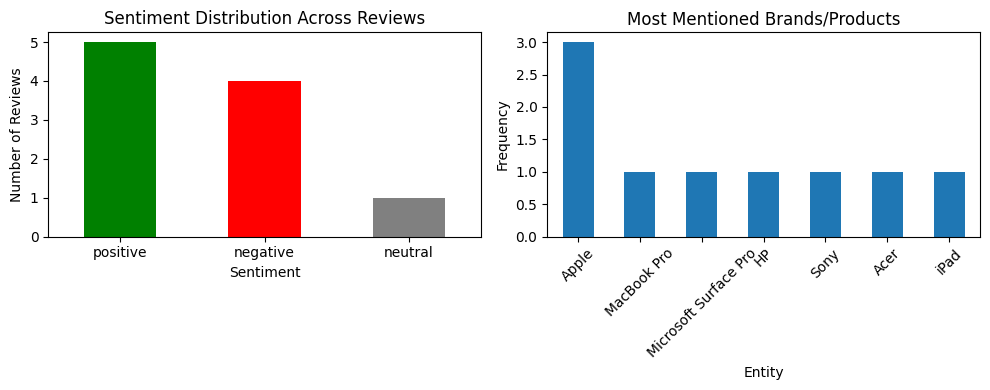

In [4]:
# Define sentiment word lists (expand as needed)
positive_words = {
    'love', 'amazing', 'fantastic', 'great', 'excellent', 'awesome', 'perfect',
    'good', 'best', 'recommended', 'stunning', 'incredible', 'worth', 'helpful'
}

negative_words = {
    'terrible', 'worst', 'bad', 'awful', 'horrible', 'nightmare', 'avoid',
    'freezing', 'unhelpful', 'drains', 'stopped', 'jams', 'slow', 'cheap'
}

def analyze_sentiment(text):
    """Simple rule-based sentiment analysis"""
    doc = nlp(text.lower())
    positive_count = 0
    negative_count = 0

    # Count positive and negative words
    for token in doc:
        if token.text in positive_words:
            positive_count += 1
        elif token.text in negative_words:
            negative_count += 1

    # Determine sentiment
    if positive_count > negative_count:
        return "positive", positive_count, negative_count
    elif negative_count > positive_count:
        return "negative", positive_count, negative_count
    else:
        return "neutral", positive_count, negative_count

# Analyze sentiment for all reviews
print("🎭 SENTIMENT ANALYSIS RESULTS:\n")
sentiment_results = []

for i, review in enumerate(sample_reviews):
    sentiment, pos_count, neg_count = analyze_sentiment(review)
    sentiment_results.append({
        'review_id': i,
        'review_text': review[:80] + "...",  # Preview
        'sentiment': sentiment,
        'positive_words': pos_count,
        'negative_words': neg_count
    })

    print(f"Review {i+1}: {sentiment.upper()}")
    print(f"  Positive words: {pos_count}, Negative words: {neg_count}")
    print(f"  Preview: {review[:80]}...")
    print("-" * 60)

# Create summary visualization
sentiment_df = pd.DataFrame(sentiment_results)
sentiment_counts = sentiment_df['sentiment'].value_counts()

plt.figure(figsize=(10, 4))

# Sentiment distribution
plt.subplot(1, 2, 1)
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution Across Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)

# Entity frequency
plt.subplot(1, 2, 2)
all_entities = []
for data in entities_data:
    for ent in data['entities']:
        all_entities.append(ent['text'])

entity_counts = Counter(all_entities)
if entity_counts:
    pd.Series(entity_counts).plot(kind='bar')
    plt.title('Most Mentioned Brands/Products')
    plt.xlabel('Entity')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [5]:
# Final comprehensive output
print("📊 COMPREHENSIVE NLP ANALYSIS REPORT")
print("=" * 60)

for i, (entities, sentiment) in enumerate(zip(entities_data, sentiment_results)):
    print(f"\nReview {i+1}:")
    print(f"Text: {sample_reviews[i]}")
    print(f"Sentiment: {sentiment['sentiment'].upper()} "
          f"(+{sentiment['positive_words']}/-{sentiment['negative_words']})")

    if entities['entities']:
        print("Extracted Entities:")
        for ent in entities['entities']:
            print(f"  • {ent['text']} → {ent['label']}")
    else:
        print("  No specific entities detected")
    print("-" * 80)

# Summary statistics
print(f"\n📈 SUMMARY STATISTICS:")
print(f"Total Reviews: {len(sample_reviews)}")
print(f"Positive: {sum(1 for s in sentiment_results if s['sentiment'] == 'positive')}")
print(f"Negative: {sum(1 for s in sentiment_results if s['sentiment'] == 'negative')}")
print(f"Neutral: {sum(1 for s in sentiment_results if s['sentiment'] == 'neutral')}")
print(f"Total Entities Found: {sum(len(data['entities']) for data in entities_data)}")

📊 COMPREHENSIVE NLP ANALYSIS REPORT

Review 1:
Text: I absolutely love my new iPhone from Apple. The camera quality is stunning and battery life lasts all day!
Sentiment: POSITIVE (+2/-0)
Extracted Entities:
  • Apple → ORG
--------------------------------------------------------------------------------

Review 2:
Text: This Samsung Galaxy phone is terrible. It keeps freezing and the customer service was unhelpful.
Sentiment: NEGATIVE (+0/-3)
  No specific entities detected
--------------------------------------------------------------------------------

Review 3:
Text: Bought a MacBook Pro for work and it's been fantastic. Apple products never disappoint.
Sentiment: POSITIVE (+1/-0)
Extracted Entities:
  • MacBook Pro → ORG
  • Apple → ORG
--------------------------------------------------------------------------------

Review 4:
Text: The Google Pixel camera is amazing but the battery drains too quickly.
Sentiment: NEUTRAL (+1/-1)
  No specific entities detected
---------------------